# Content


>[Content](#folderId=1J9TOWvQFM0L3uKI8TxMbi2cJKrikq3i-&updateTitle=true&scrollTo=zXBUjSnNweZj)

>[Neural Networks](#folderId=1J9TOWvQFM0L3uKI8TxMbi2cJKrikq3i-&updateTitle=true&scrollTo=vc8WxKSxryRw)

>>[Linear Regression](#folderId=1J9TOWvQFM0L3uKI8TxMbi2cJKrikq3i-&updateTitle=true&scrollTo=VmR989Y_qmMW)

>>[Logistic Regression](#folderId=1J9TOWvQFM0L3uKI8TxMbi2cJKrikq3i-&updateTitle=true&scrollTo=FQssfpdxywqs)

>>>[Save and Load Model](#folderId=1J9TOWvQFM0L3uKI8TxMbi2cJKrikq3i-&updateTitle=true&scrollTo=sP8HXTlm4OUu)



# Neural Networks

## Linear Regression

In [7]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

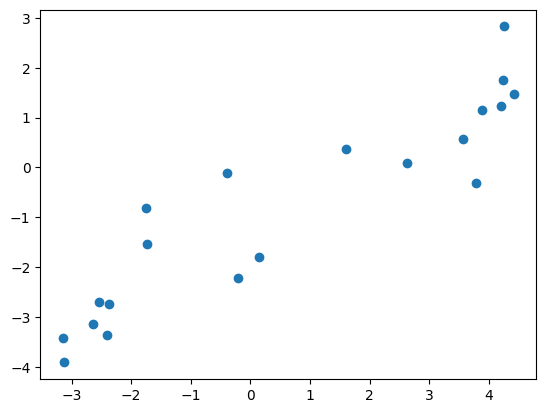

In [8]:
# we would like to generate 20 data points
N = 20

# random data on the x-axis in (-5, +5)
X = np.random.random(N)*10 - 5

# a line plus some noise
Y = 0.5 * X - 1 + np.random.randn(N)

# Plot the data
plt.scatter(X, Y);

In [9]:
# In ML we want our data to be of shape:
# (num_samples x num_dimensions)
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

# PyTorch uses float32 by default
# Numpy creates float64 by default
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

type(inputs)

torch.Tensor

In [10]:
# Create the linear regression model
model = nn.Linear(1, 1)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [11]:
# Train the model
n_epochs = 30
losses = []
for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # keep the loss so we can plot it later
  losses.append(loss.item())

  # Backward and optimize
  loss.backward()
  optimizer.step()

  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 1/30, Loss: 8.0657
Epoch 2/30, Loss: 5.3005
Epoch 3/30, Loss: 3.5662
Epoch 4/30, Loss: 2.4755
Epoch 5/30, Loss: 1.7875
Epoch 6/30, Loss: 1.3525
Epoch 7/30, Loss: 1.0767
Epoch 8/30, Loss: 0.9014
Epoch 9/30, Loss: 0.7897
Epoch 10/30, Loss: 0.7184
Epoch 11/30, Loss: 0.6728
Epoch 12/30, Loss: 0.6436
Epoch 13/30, Loss: 0.6248
Epoch 14/30, Loss: 0.6127
Epoch 15/30, Loss: 0.6049
Epoch 16/30, Loss: 0.5999
Epoch 17/30, Loss: 0.5966
Epoch 18/30, Loss: 0.5945
Epoch 19/30, Loss: 0.5931
Epoch 20/30, Loss: 0.5923
Epoch 21/30, Loss: 0.5917
Epoch 22/30, Loss: 0.5913
Epoch 23/30, Loss: 0.5911
Epoch 24/30, Loss: 0.5909
Epoch 25/30, Loss: 0.5908
Epoch 26/30, Loss: 0.5907
Epoch 27/30, Loss: 0.5907
Epoch 28/30, Loss: 0.5907
Epoch 29/30, Loss: 0.5906
Epoch 30/30, Loss: 0.5906


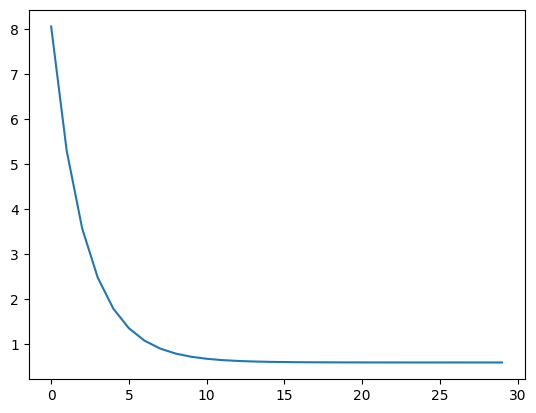

In [12]:
# Plot the loss per iteration
plt.plot(losses);

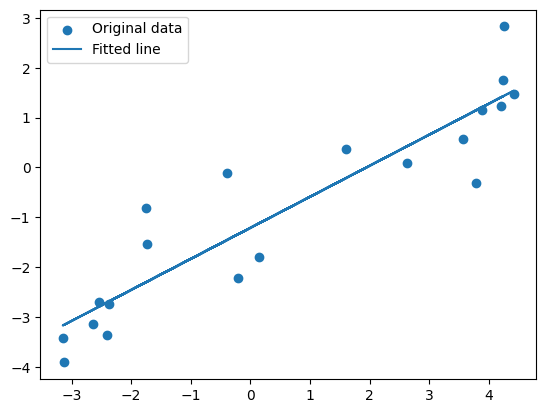

In [13]:
# Plot the graph
predicted = model(inputs).detach().numpy() # Throws error if not detached first
plt.scatter(X, Y, label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()

In [15]:
# Another way, instead of calling detach
with torch.no_grad():
  out = model(inputs).numpy()
out

array([[-0.21129191],
       [-1.4522172 ],
       [-2.6882527 ],
       [ 1.4075803 ],
       [-2.7937555 ],
       [ 1.540198  ],
       [ 1.2103118 ],
       [ 1.0122842 ],
       [ 1.4273728 ],
       [-2.3007736 ],
       [ 1.434842  ],
       [ 0.4251157 ],
       [-2.2886307 ],
       [-3.161564  ],
       [-1.3392979 ],
       [-3.171773  ],
       [-2.85942   ],
       [ 1.1497535 ],
       [-2.7146525 ],
       [-1.1201562 ]], dtype=float32)

In [16]:
# True values of (w, b) are (0.5, -1)
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w, b)

[[0.62295854]] [-1.2115074]


## Logistic Regression

In [27]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

In [19]:
# load the data
data = load_breast_cancer()

# check the type of 'data'
type(data)

sklearn.utils._bunch.Bunch

In [20]:
# this basically acts like a dictionary where you can treat the keys like attributes
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [21]:
# 'data' (the attribute) means the input data
data.data.shape
# it has 569 samples, 30 features

(569, 30)

In [22]:
# 'targets'
data.target
# note how the targets are just 0s and 1s
# normally, when you have K targets, they are labeled 0..K-1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [23]:
# their meaning is not lost
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [24]:
# there are also 569 corresponding targets
data.target.shape

(569,)

In [28]:
# split the data into train and test sets
# this lets us simulate how our model will perform in the future
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# Convert data into torch tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1)) # In PyTorch we need the output to be a 2d array of (N, 1) instead of an 1d array
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

In [30]:
# Build the model
model = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)

# We don't put the sigmoid in the model anymore since it will be calculated along with the loss in the criterion.
# model = nn.Linear(D, 1)

# Loss and optimizer
criterion = nn.BCELoss()

# This function calculates the BCE loss directly from the logits which are the outputs from the logistic function.
# criterion = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(model.parameters())

In [31]:
# Train the model
n_epochs = 1000

# Stuff to store
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)
train_accuracies = np.zeros(n_epochs)
test_accuracies = np.zeros(n_epochs)

for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(X_train)
  loss = criterion(outputs, y_train)

  # Backward and optimize
  loss.backward()
  optimizer.step()

  # Get test loss. For this we will run the model again, but now on the test set and recalculate the loss for it.
  outputs_test = model(X_test)
  loss_test = criterion(outputs_test, y_test)

  # Save losses
  train_losses[it] = loss.item()
  test_losses[it] = loss_test.item()


  # Get accuracy
  with torch.no_grad():
    p_train = np.round(outputs.numpy())
    train_acc = np.mean(p_train == y_train.numpy())

    p_test = np.round(outputs_test.numpy())
    test_acc = np.mean(p_test == y_test.numpy())

  #Save accuracies
  train_accuracies[it] = train_acc
  test_accuracies[it] = test_acc

  if (it + 1) % 50 == 0:
    print(f'Epoch {it+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

Epoch 50/1000, Train Loss: 0.5664, Test Loss: 0.5736, Train Acc: 0.7874, Test Acc: 0.7766
Epoch 100/1000, Train Loss: 0.4127, Test Loss: 0.4090, Train Acc: 0.9108, Test Acc: 0.9096
Epoch 150/1000, Train Loss: 0.3299, Test Loss: 0.3194, Train Acc: 0.9344, Test Acc: 0.9415
Epoch 200/1000, Train Loss: 0.2784, Test Loss: 0.2640, Train Acc: 0.9528, Test Acc: 0.9628
Epoch 250/1000, Train Loss: 0.2434, Test Loss: 0.2265, Train Acc: 0.9554, Test Acc: 0.9628
Epoch 300/1000, Train Loss: 0.2180, Test Loss: 0.1995, Train Acc: 0.9606, Test Acc: 0.9681
Epoch 350/1000, Train Loss: 0.1989, Test Loss: 0.1793, Train Acc: 0.9633, Test Acc: 0.9681
Epoch 400/1000, Train Loss: 0.1838, Test Loss: 0.1635, Train Acc: 0.9659, Test Acc: 0.9681
Epoch 450/1000, Train Loss: 0.1717, Test Loss: 0.1509, Train Acc: 0.9685, Test Acc: 0.9734
Epoch 500/1000, Train Loss: 0.1617, Test Loss: 0.1406, Train Acc: 0.9685, Test Acc: 0.9734
Epoch 550/1000, Train Loss: 0.1533, Test Loss: 0.1321, Train Acc: 0.9711, Test Acc: 0.9734


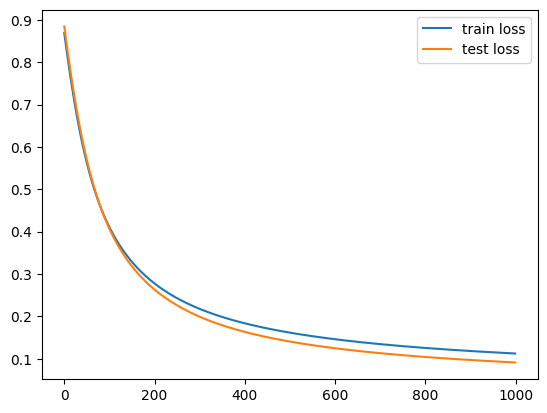

In [32]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

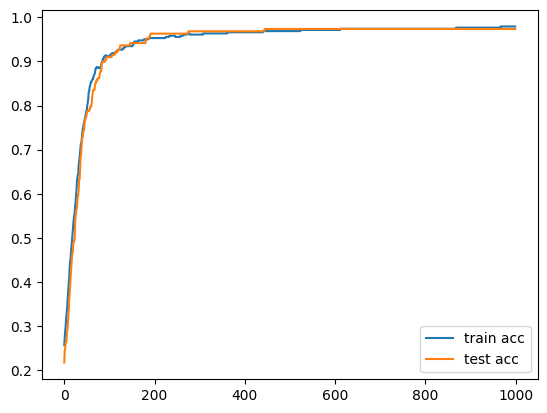

In [33]:
# Plot the train acc and test acc per iteration
plt.plot(train_accuracies, label = 'train acc')
plt.plot(test_accuracies, label = 'test acc')
plt.legend()
plt.show()

In [34]:
# Get accuracy
with torch.no_grad():
  p_train = model(X_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = model(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() == p_test)
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9790, Test acc: 0.9734


### Save and Load Model

In [35]:
# Look at the state dict
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3507, -0.5537, -0.3271, -0.2566, -0.2634, -0.1337, -0.3113, -0.4842,
                       -0.0696,  0.5199, -0.4179,  0.0270, -0.4713, -0.2177,  0.0490,  0.0698,
                        0.0194, -0.2528,  0.0112,  0.6345, -0.3092, -0.3225, -0.3122, -0.1879,
                       -0.4533, -0.1696, -0.4545, -0.1962, -0.2190, -0.2546]])),
             ('0.bias', tensor([0.4475]))])

In [36]:
# Save the model
torch.save(model.state_dict(), 'mymodel.pt')

In [37]:
# Load the model
# Note: this makes more sense and is more compact when
# your model is a big class, as we will be seeing later.
model2 = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)
model2.load_state_dict(torch.load('mymodel.pt'))

<All keys matched successfully>

In [38]:
# Evaluate the new model
# Results should be the same!
with torch.no_grad():
  p_train = model2(X_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = model2(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() == p_test)
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9790, Test acc: 0.9734
